
Practical 5:
Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv(r"C:\\Users\\omkar\\Downloads\\Social_Network_Ads_Large.csv")

In [3]:
# check the dataset for missing values and perform EDA
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15670487,Male,57,34953,0
1,15116739,Male,40,117195,1
2,15026225,Male,25,77587,0
3,15777572,Female,24,136591,0
4,15288389,Female,57,145412,1


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15420521,Male,54,61802,1
396,15946279,Female,19,95176,0
397,15061483,Female,31,27175,0
398,15172634,Female,23,26652,0
399,15397382,Female,57,148813,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN
freq,NaN,208,NaN,NaN,NaN
mean,1.548762e+07,NaN,38.127500,82703.757500,0.490000
std,2.917693e+05,NaN,12.120169,38960.457201,0.500526
min,1.500060e+07,NaN,18.000000,15416.000000,0.000000
25%,1.523076e+07,NaN,28.000000,48929.500000,0.000000
50%,1.548491e+07,NaN,38.000000,81317.000000,0.000000
75%,1.573965e+07,NaN,48.000000,119596.750000,1.000000


In [7]:
df.shape

(400, 5)

In [8]:
df.size

2000

In [9]:
df.ndim

2

In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [12]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
#select the features and target variable
# Selecting independent variables (features) and dependent variable (target)
X = df[['Age', 'EstimatedSalary']]  # Assuming these are features
y = df['Purchased']  # Target variable


In [14]:
# Splitting dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)



Training Set Size: (320, 2)
Testing Set Size: (80, 2)


In [52]:
X_train

array([[-1.14285341,  1.33743149],
       [-1.55872002, -0.17215685],
       [ 1.43551954, -1.32782826],
       [ 0.1047464 , -0.11989438],
       [-1.4755467 , -0.53111022],
       [-1.64189334, -0.46282733],
       [-1.64189334,  0.27003685],
       [ 1.10282625, -1.6585118 ],
       [-0.06160024, -1.36164069],
       [ 0.60378633, -0.17005623],
       [ 0.18791972,  0.08348638],
       [-0.47746685,  0.74829545],
       [-1.22602673,  0.38769702],
       [-0.56064017, -1.54474917],
       [ 0.85330629,  0.91072672],
       [-1.4755467 , -0.13199194],
       [-1.4755467 ,  0.74252506],
       [-0.72698681, -1.42488714],
       [-0.56064017, -0.51498857],
       [ 0.27109304, -1.44138842],
       [ 0.77013297,  1.60372969],
       [ 0.60378633, -0.45067915],
       [ 0.27109304,  1.25953129],
       [-0.97650677,  1.34669448],
       [ 1.26917289,  0.36385622],
       [ 1.6850395 ,  0.63744332],
       [-0.22794688,  0.04795296],
       [ 1.76821282,  1.37620443],
       [ 0.02157308,

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [29]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [30]:
y_test.values

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")



Accuracy: 0.7625


In [32]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values
TN, FP, FN, TP = cm.ravel()

# Print confusion matrix and extracted values
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


Confusion Matrix:
[[27 10]
 [ 9 34]]

True Positives (TP): 34
False Positives (FP): 10
True Negatives (TN): 27
False Negatives (FN): 9


In [33]:
precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision:.4f}")



Precision: 0.7727


In [34]:
recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall:.4f}")



Recall: 0.7907


In [35]:
error_rate = 1 - accuracy
print(f"\nError Rate: {error_rate:.4f}")



Error Rate: 0.2375


In [36]:
f1 = f1_score(y_test, y_pred)
print(f"\nF1 Score: {f1:.4f}")



F1 Score: 0.7816


In [37]:
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        37
           1       0.77      0.79      0.78        43

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



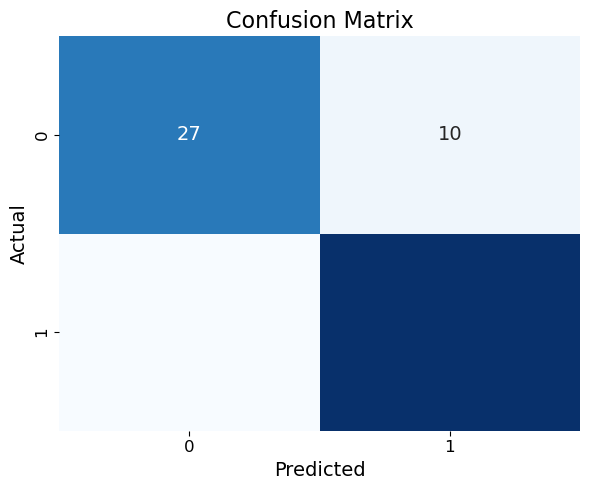

In [44]:
plt.figure(figsize=(6, 5))  # Increase the size to fit all text clearly
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


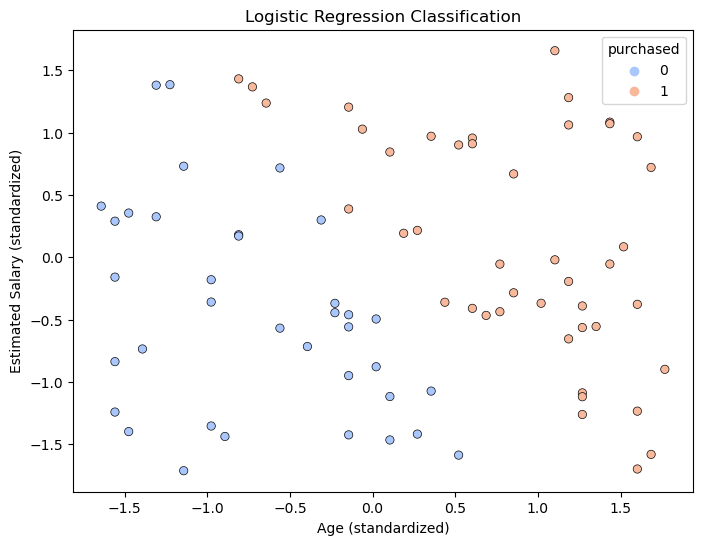

In [51]:
feature_names = ['Age', 'EstimatedSalary']

# Turn the scaled array back into a DataFrame
X_test_df = pd.DataFrame(X_test, columns=feature_names)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X_test_df,
    x='Age',
    y='EstimatedSalary',
    hue=y_pred,        # colors by predicted class
    palette='coolwarm',
    edgecolor='k'
)
plt.xlabel('Age (standardized)')
plt.ylabel('Estimated Salary (standardized)')
plt.title('Logistic Regression Classification')
plt.legend(title='purchased')
plt.show()
